# **Quantum Teleportation Protocol**

### **Introduction**

This code implements the quantum teleportation protocol using Qiskit, a quantum computing framework in Python. The following sections provide an overview of the code structure, its key components, and an analysis of the teleportation process with associated mathematical descriptions.

### **Overview of Teleportation**

Quantum teleportation unfolds through four crucial steps involving three main participants: the sender (**Alice**), the receiver (**Bob**), and an entangled pair of qubits.

1. **Entanglement Generation**: Alice initializes an entangled pair of qubits, one for herself (**A**) and one for Bob (**B**).

2. **State Transfer**: Alice entangles her qubit (**Q**) with her portion of the entangled pair, transferring the quantum state.

3. **Measurement**: Alice performs measurements on her qubits (**Q** and **A**) and communicates the results to Bob using classical communication.

4. **State Reconstruction**: Bob utilizes the received classical information to manipulate his entangled qubit (**B**), thereby reconstructing the original quantum state.

#### **No-Cloning Theorem**

The no-cloning theorem, integral to quantum teleportation, posits that an unknown quantum state cannot be precisely copied. In the context of teleportation, this dictates that the quantum state of Alice's qubit (**Q**) cannot be cloned and sent to Bob. Instead, the state is transferred via entanglement and measurement, adhering to the fundamental laws of quantum mechanics.

### **Mathematical Analysis**

The quantum teleportation protocol involves a series of quantum operations and measurements, which can be mathematically described using the principles of quantum mechanics. Let's break down the key mathematical aspects of the teleportation process:

1. **Entangled State Initialization:**

The entangled state ∣Ψ⟩ created by applying Hadamard (**H**) and controlled-X (**CX**) gates can be represented mathematically as:

$$
|\Psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle)
$$

2. **Transfer of Information:**

The controlled-X gate (**CX**) transfers the state of the qubit (**Q**) to the entangled state (**A**):

$$
|\Psi'\rangle = C_X(Q, A) \cdot |\Psi\rangle
$$

The Hadamard gate (**H**) is then applied to **Q**:

$$
|\Psi''\rangle = H(Q) \cdot |\Psi'\rangle
$$

3. **Measurements and Corrections:**

Measurements are performed on **Q** and **A**, yielding classical bits **a** and **b**. Corrections are then applied to BB based on these measurement outcomes:

$$
B = Z(B, a) \cdot X(B, b) \cdot A
$$

4. **Random Quantum Information:**

The randomly generated unitary gate **U** applied to **Q** during the initialization can be expressed as a general single-qubit unitary matrix:

$$
U = \begin{bmatrix} e^{-i(\lambda + \phi)/2}\cos(\theta/2) & -e^{-i(\lambda - \phi)/2}\sin(\theta/2) \\ e^{i(\lambda - \phi)/2}\sin(\theta/2) & e^{i(\lambda + \phi)/2}\cos(\theta/2) \end{bmatrix}
$$

5. **Applying Inverse Gate:**

The inverse of the randomly generated gate (**U<sup>−1</sup>**) is applied to **B**:
$$
B' = U^{-1} \cdot B
$$

6. **Simulation and Measurement Statistics:**

The test circuit is simulated, and the measurement statistics are obtained. The probability distribution of outcomes is then visualized through histograms.

### **Prerequisites**

To run the provided code, you need the following Python libraries:

- Qiskit
- NumPy
- SymPy
- Matplotlib
- IPython

Ensure that you have these libraries installed before executing the code.

### **Code Overview**
1. **Import necessary libraries**

These imports bring in the required functionalities for quantum computing, visualization, and mathematical operations. Each library/module serves a specific purpose, such as circuit creation, visualization, random number generation, and display functionality.

In [1]:
# Import necessary libraries from Qiskit and other modules

from qiskit import *
from qiskit.circuit.library import UGate
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.visualization import plot_histogram, text
from qiskit.result import marginal_distribution
from qiskit.quantum_info import Statevector
from IPython.display import display, Math
import sympy as sym
import numpy as np
from numpy import pi, random

2. **Initialization of Quantum and Classical Registers**

The quantum teleportation protocol involves the use of quantum registers to store qubits and classical registers for measurement outcomes. The code initializes quantum registers for the sender's qubit (**qubit**), and entangled qubits (**ebit0** and **ebit1**), along with classical registers (**a** and **b**) to store measurement results.

In [2]:
# Define quantum registers for qubits (Q), entangled bits (A and B), and classical bits (a and b)
qubit = QuantumRegister(1, 'Q')
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

# Create a quantum circuit named 'teleportation' using the defined registers
teleportation = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Uncomment the line below to display the initial circuit diagram
# display(teleportation.draw(output='mpl', style="iqp"))


3. **Initialize E-Bit**

The entangled state, also known as an E-Bit, is created by applying Hadamard (**h**) gate on **ebit0** and a controlled-X (**cx**) gate between **ebit0** and **ebit1**.

In [3]:
# Apply Hadamard gate to create entanglement in ebit0
teleportation.h(ebit0)

# Apply controlled-X gate to entangle ebit0 and ebit1
teleportation.cx(ebit0, ebit1)

# Add a barrier to visually separate different stages of the circuit
teleportation.barrier()

# Uncomment the line below to display the circuit diagram after entanglement
# display(teleportation.draw(output='mpl', style="iqp"))


4. **Transfer of Information**

This section executes the transfer of quantum information from Alice's qubit (qubit) to the entangled state (ebit0). A controlled-X (**cx**) gate is applied to achieve this transfer, and a Hadamard gate (**h**) is applied to the qubit.

In [4]:
# Apply controlled-X gate to transfer quantum information from qubit to ebit0
teleportation.cx(qubit, ebit0)

# Apply Hadamard gate to qubit
teleportation.h(qubit)

# Add a barrier to visually separate different stages of the circuit
teleportation.barrier()

# Uncomment the line below to display the circuit diagram after transferring information
# display(teleportation.draw(output='mpl', style="iqp"))


5. **Perform Measurements**

In this part of the code, measurements are performed on Alice's qubit (**qubit**) and the first entangled qubit (**ebit0**). The measurement results are stored in classical registers **a** and **b**. 

In [5]:
# Perform measurements on qubit and ebit0, storing results in classical registers a and b
teleportation.measure(qubit, a)
teleportation.measure(ebit0, b)

# Add a barrier to visually separate different stages of the circuit
teleportation.barrier()

# Uncomment the line below to display the circuit diagram after measurements
# display(teleportation.draw(output='mpl', style="iqp"))


6. **Perform Corrections**

In this segment, corrections are applied to the second entangled qubit (**ebit1**) based on the measurement outcomes stored in classical registers **a** and **b**. A conditional Z gate (**teleportation.z(ebit1).c_if(a, 1)**) and a conditional X gate (**teleportation.x(ebit1).c_if(b, 1)**) are applied if result of measurement is **1**.

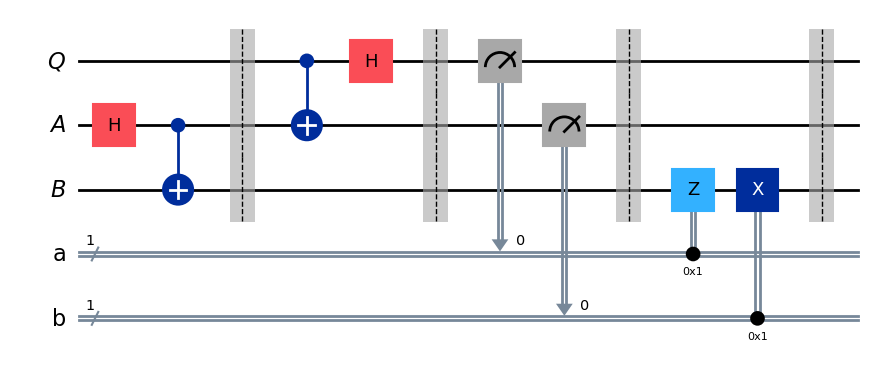

In [6]:
# Perform corrections on the second entangled qubit (ebit1) based on measurement outcomes
teleportation.z(ebit1).c_if(a, 1)
teleportation.x(ebit1).c_if(b, 1)

# Add a barrier to visually separate different stages of the circuit
teleportation.barrier()

# Display the circuit diagram after applying corrections
display(teleportation.draw(output='mpl', style="iqp"))

7. **Random Quantum Information**

In this snippet, a random unitary gate (**random_data**) is generated with random values for theta, phi, and lambda. This gate represents the random transformation applied to Alice's qubit during the quantum teleportation protocol.

The current value of this unitary gate is then displayed using LaTeX formatting. Tou may run this cell again to receive different values.

In [7]:
# Generate random quantum information in the form of a unitary gate
random_data = UGate(
    theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
)

# Display the current value of the generated unitary gate (U)
display(Math('\\text{Current value of }U = %s' %(sym.latex(sym.sympify(np.round(random_data.to_matrix(), 3))))))


<IPython.core.display.Math object>

8. **Create Test Circuit**

This section creates a test circuit (**test_teleport**) for the teleportation process. It initializes the teleported qubit (**Q**) with the randomly selected gate (**random_data**). And the teleportation protocol from the earlier defined circuit is appended to the test circuit. The resulting circuit diagram is displayed.

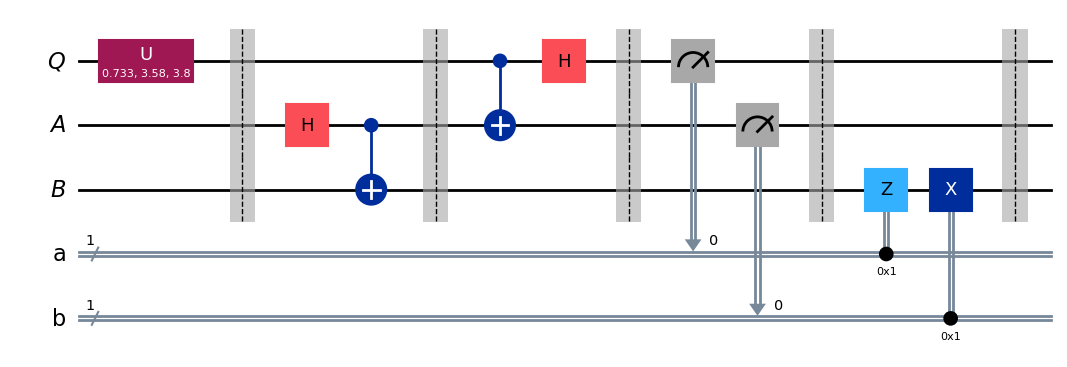

In [8]:
# Create a test circuit for teleportation with the same registers
test_teleport = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Initialize the teleported qubit Q with the randomly selected gate (random_data)
test_teleport.append(random_data, qubit)

# Add a barrier to visually separate different stages of the circuit
test_teleport.barrier()

# Append the previously defined teleportation protocol to the test circuit
test_teleport = test_teleport.compose(teleportation)

# Display the circuit diagram of the test teleportation circuit
display(test_teleport.draw(output='mpl', style="iqp"))


9. **Inverse State vector**

In this part of the code, the inverse of the random unitary gate (**random_data.inverse()**) is applied to the second entangled qubit (**ebit1**). Subsequently, the state of this qubit is measured, and the measurement result is stored in a classical register named 'Result'. The circuit diagram after these operations is displayed.

The application of an inverted U gate in the quantum teleportation protocol serves to demonstrate the successful transmission of quantum information. The inverted gate is applied to Bob's qubit **B** (**ebit1**) after the teleportation process, and it is chosen to be the inverse of the random quantum gate applied to Alice's qubit (**qubit**). The application of the inverted gate is designed to bring Bob's qubit back to initial state of Alice's sent qubit **Q** (**qubit**), providing a verification mechanism for the accuracy of the teleportation.

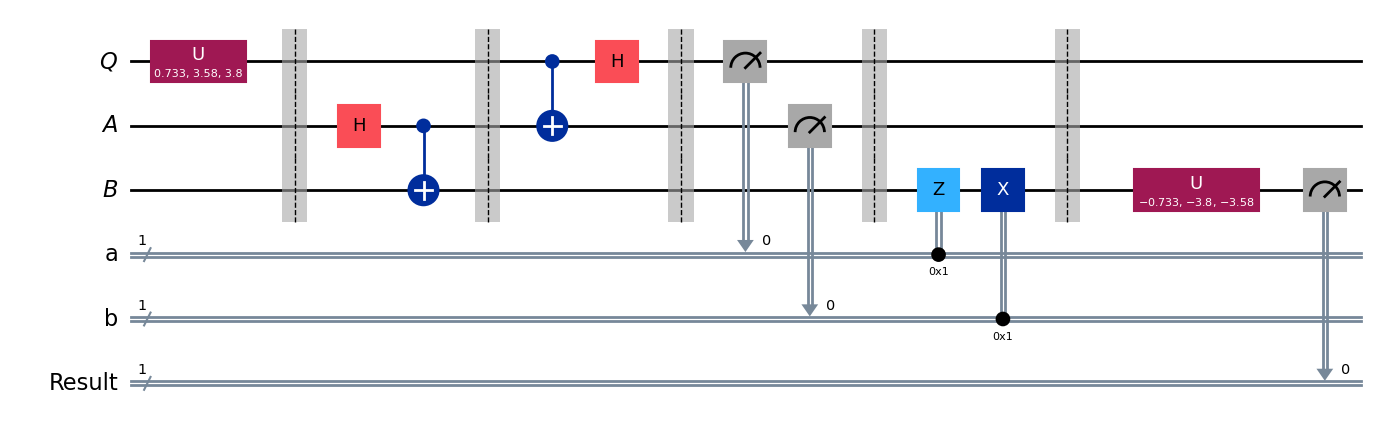

In [9]:
# Apply the inverse of the random U gate to qubit B (ebit1)
test_teleport.append(random_data.inverse(), ebit1)

# Create a classical register 'Result' to store measurement outcomes
result = ClassicalRegister(1, 'Result')
test_teleport.add_register(result)

# Measure qubit B (ebit1) and store the result in the 'Result' classical register
test_teleport.measure(ebit1, result)

# Display the circuit diagram after applying the inverse gate and measurement
display(test_teleport.draw(output='mpl', style="iqp"))


10. **Run Simulation** 

This section runs the simulation of the test teleportation circuit on the QASM simulator with a specified number of shots (1024). The results of the simulation, specifically the measurement statistics, are then stored in the **statistics** variable for further analysis and visualization.

In [10]:
# Run the simulation of the test teleportation circuit on the QASM simulator
simulator = Aer.get_backend('qasm_simulator')
test = execute(test_teleport, backend=simulator, shots=1024).result()

# Retrieve the measurement statistics from the simulation results
statistics = test.get_counts(test_teleport)

### **Visualization**

The visualization enhances the understanding of the quantum teleportation protocol by providing graphical representations of final measurement. Visualizations include quantum circuit diagrams and histograms of measurement outcomes.

This line of code uses Qiskit's **plot_histogram** function to visualize the measurement statistics obtained from the simulation. The resulting histogram provides insights into the probability distribution of measurement outcomes for the test teleportation circuit.

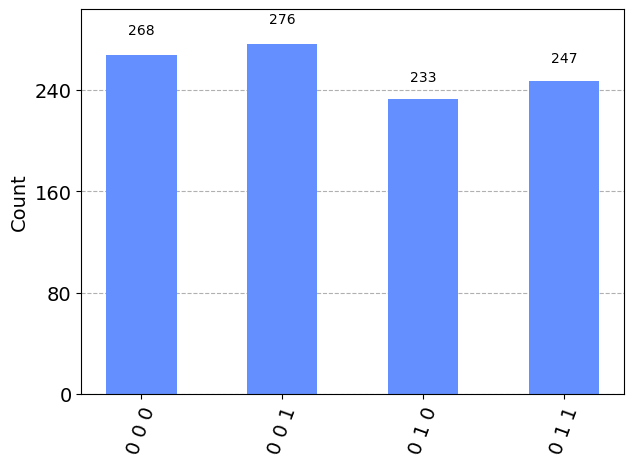

In [11]:
# Display a histogram of the measurement statistics
display(plot_histogram(statistics))

In this snippet, the code extracts the marginal distribution for the qubit B (**ebit1**) from the overall measurement statistics obtained in the simulation. The resulting filtered statistics represent the probability distribution of measurement outcomes specifically for qubit **B**. The plot_histogram function is then used to visualize this filtered distribution.

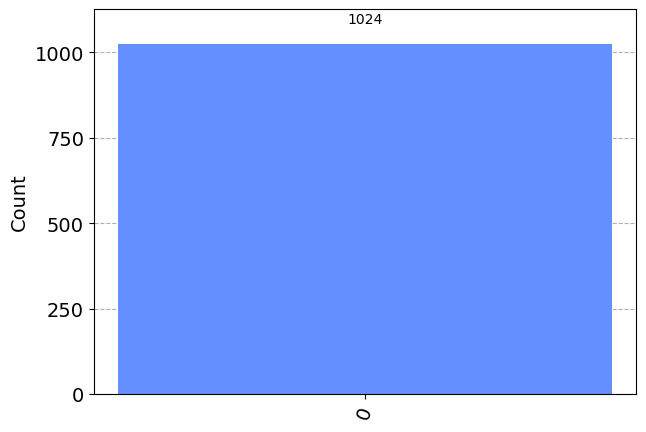

In [12]:
# Extract the marginal distribution for the qubit B (ebit1) from the overall statistics
filtered_statistics = marginal_distribution(statistics, [2])

# Display a histogram of the filtered measurement statistics
display(plot_histogram(filtered_statistics))

### **Conclusion**

In this Qiskit-based quantum teleportation exploration, we delved into the foundations of quantum mechanics, emphasizing entanglement and the application of gates for secure information transmission. We initiated the process by setting up quantum and classical registers, establishing an entangled state through Hadamard and controlled-X gates, and orchestrating the transfer of quantum information between qubits.

Executing measurements and corrections, we confronted the challenges posed by the no-cloning theorem. A pivotal element was the introduction of random quantum gates, simulating the inherent unpredictability of quantum states. The subsequent creation and execution of a test circuit validated the protocol's functionality, and a simulation provided insights into measurement outcomes through visually compelling histograms. This documentation serves as a practical guide to quantum teleportation, highlighting its principles and the intricate dance of quantum states in the quest for secure information transfer.